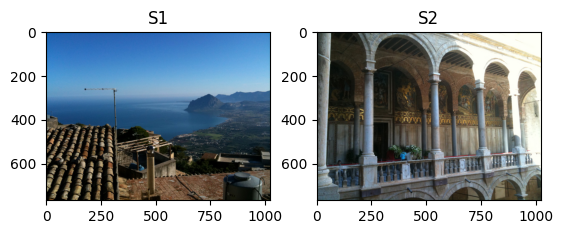

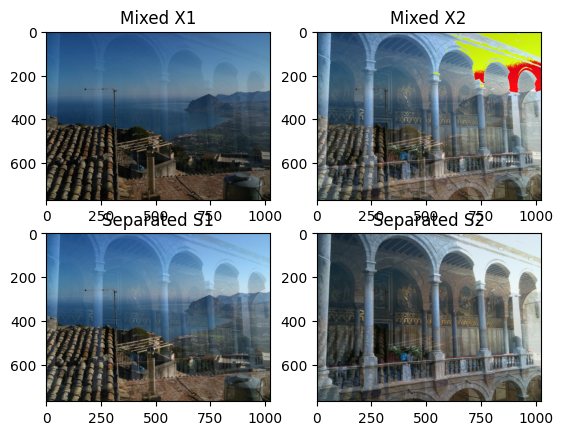

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage.color import rgb2gray

# Load images
S1 = np.array(Image.open('sicily1.jpg'))
S2 = np.array(Image.open('sicily2.jpg'))

# Display original images
plt.subplot(2, 2, 1)
plt.imshow(S1)
plt.title('S1')
plt.subplot(2, 2, 2)
plt.imshow(S2)
plt.title('S2')

# Mixing matrix
A = np.array([[0.7, 0.1], [1/2, 2/3]])

# Mix images
X1 = A[0, 0] * S1 + A[0, 1] * S2
X2 = A[1, 0] * S1 + A[1, 1] * S2

# Display mixed images
plt.figure(2)
plt.subplot(2, 2, 1)
plt.imshow(X1.astype('uint8'))
plt.title('Mixed X1')
plt.subplot(2, 2, 2)
plt.imshow(X2.astype('uint8'))
plt.title('Mixed X2')

# Compute means
X1bw = rgb2gray(X1);
X2bw = rgb2gray(X2);

m, n = X1bw.shape
x1 = X1bw.reshape(m * n, 1)
x2 = X2bw.reshape(m * n, 1)
x1 = x1 - np.mean(x1)
x2 = x2 - np.mean(x2)

# Estimate rotation angle theta0
theta0 = 0.5 * np.arctan(-2 * np.sum(x1 * x2) / np.sum(x1 ** 2 - x2 ** 2))

# Construct rotation matrix
Us = np.array([[np.cos(theta0), np.sin(theta0)], [-np.sin(theta0), np.cos(theta0)]])

# Estimate variances
sig1 = np.sum((x1 * np.cos(theta0) + x2 * np.sin(theta0)) ** 2)
sig2 = np.sum((x1 * np.cos(theta0 - np.pi/2) + x2 * np.sin(theta0 - np.pi/2)) ** 2)

# Construct scaling matrix
Sigma = np.array([[1 / np.sqrt(sig1), 0], [0, 1 / np.sqrt(sig2)]])

# Whiten mixed signals
X1bar = Sigma[0, 0] * (Us[0, 0] * X1 + Us[0, 1] * X2)
X2bar = Sigma[1, 1] * (Us[1, 0] * X1 + Us[1, 1] * X2)

# Estimate rotation angle phi0
phi0 = 0.25 * np.arctan(-np.sum(2 * (X1bar ** 3) * X2bar - 2 * X1bar * (X2bar ** 3)) / 
                        np.sum(3 * (X1bar ** 2) * (X2bar ** 2) - 0.5 * (X1bar ** 4) - 0.5 * (X2bar ** 4)))

# Construct rotation matrix
V = np.array([[np.cos(phi0), np.sin(phi0)], [-np.sin(phi0), np.cos(phi0)]])

# Reconstruct sources
S1bar = V[0, 0] * X1bar + V[0, 1] * X2bar
S2bar = V[1, 0] * X1bar + V[1, 1] * X2bar

# Normalize and display separated sources
min1 = np.min(S1bar)
S1bar = S1bar - min1
max1 = np.max(S1bar)
S1bar = S1bar * (255 / max1)

min2 = np.min(S2bar)
S2bar = S2bar - min2
max2 = np.max(S2bar)
S2bar = S2bar * (255 / max2)

plt.subplot(2, 2, 3)
plt.imshow(S1bar.astype('uint8'))
plt.title('Separated S1')
plt.subplot(2, 2, 4)
plt.imshow(S2bar.astype('uint8'))
plt.title('Separated S2')

plt.show()
